# Let's Discuss Next Steps - 

1  __Classification Models__

- Logistic Regression
- XG Boost
- SVM 's
- Decision Trees

2  __Class Imbalance Solutions__

- Under Sampling
- Over Sampling
- SMOTE

3  __Metrics__

- Accuracy Score
- Confusion Matrix
- ROC_AUC
- F1 Score

# Under Sampling and Over Sampling

<img src = 'images/under_over_sampling.jpg'>

# Synthetic Minority OverSampling Technique
<img src='images/smote.png'>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('elementary_data_processed.csv')

In [3]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.073813


# Machine Learning Step 1

In [4]:
y = df['class'].values

X = df.drop(columns = ['time' , 'amount' , 'hour' , 'class']) # Try out with different combinations

In [5]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338670
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333399
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190387
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.018879
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338630


In [7]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
from sklearn.model_selection import train_test_split 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Sequence for splitting


logreg = LogisticRegression() # () towards the end
logreg.fit(X_train, y_train )   

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score


print(accuracy_score(y_pred , y_test))

0.9991306186705514


In [10]:
pd.Series(y_pred).value_counts()

0    85037
1       81
dtype: int64

In [11]:
pd.Series(y_test).value_counts()

0    84989
1      129
dtype: int64

In [12]:
81/129

0.627906976744186

# Class Imbalance ! 

In [13]:
# Continue from here !

In [14]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test , y_pred)

cnf_matrix

array([[84976,    13],
       [   61,    68]])

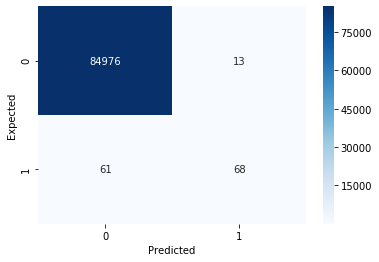

In [15]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Understanding the Confusion Matrix Plot

# __Why and When__ ? - 
### Every problem is different and derives a different set of values for a particular business use case , thus every model must be evaluated differently.

## Let's get to know the terminology and Structure first - 

A confusion matrix is defined into four parts : __{ TRUE , FALSE } (Actual) ,{POSITIVE , NEGATIVE} (Predicted)__
Positive and Negative is what you predict , True and False is what you are told

Which brings us to 4 relations : True Positive , True Negative , False Positive , False Negative <br>
__P__ redicted - __R__ ows and __A__ ctual as __C__ olumns <br>

<img src = 'images/final_cnf.png'>


## __Accuracy , Precision and Recall__


#### __Accuracy__ - > The most used and classic classification metric : Suited for binary classification problems.

Accuracy = ( TP + TN ) / (TP + TN + FP + FN )

Basically Rightly predicted results amongst all the results , used when the classes are balanced

#### __Precision__ - > What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !

Precision = ( TP ) / ( TP + FP )

#### __Recall__ - > What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible

Recall = TP / ( TP + FN )

## F1 Score

## Harmonic mean of Precision and Recall 

### F1 = 2*(precision * recall) / (precision + recall )

It basically maintains a balance between the precision and recall for your classifier

In [16]:
pd.Series(y_test).value_counts()

0    84989
1      129
dtype: int64

In [17]:
pd.Series(y_pred).value_counts()

0    85037
1       81
dtype: int64

In [18]:
len(y_test)

85118

In [19]:
(81-13)/129 # Real Accuracy 

0.5271317829457365

# What is an ROC_AUC Curve ?

<img src = images/spec_sens.jpeg>
<img src = images/tpr_fpr.png>


It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class. 

Let's talk about some definitions first: 

### __Sensitivity__ 

The sensitivity of a model is defined by the proportion of actual positives that are classified as Psitives , i.e = TP / ( TP + FN )
<img src = images/sens.png>

### __Specificity__

The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives , i.e = TN / ( TN + FP )
<img src = images/spec.png>



As we can see that both are independent of each other and lie in teo different quadrants , we can understand that they are inversely related to each other. Thus as Sensitivity goes up , Specificity goes down and vice versa.

# ROC CURVE

It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. 
It depicts if a model can clearly identify each class or not

Higher the area under the curve , better the model and it's ability to seperate the positive and negative class
<img src = images/tpfpfntn.jpeg>
<img src = images/auc.png>
<img src = images/auc2.png>

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred) 

# Accuracy - 99%
# Accuracy Stage 1 - 62%
# Accuracy Stage 2 - 52%

0.7634894109871584

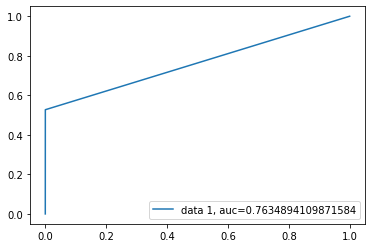

In [21]:
# Here is the Problem ! 

from sklearn.metrics import roc_curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Let's Fix the class Imbalance and apply some sampling techniques

In [24]:
# the imblearn library
!pip install imblearn

     |████████████████████████████████| 174kB 719kB/s eta 0:00:01


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [26]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v23,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.073813


In [27]:
from collections import Counter
from sklearn.datasets import make_classification

#X, y = make_classification(n_classes=2) #, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 473, 1: 473})


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now


0.9401408450704225


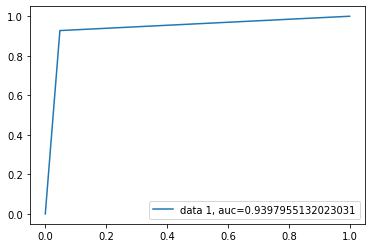

In [30]:

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Let's try Oversampling

In [31]:
from imblearn.over_sampling import RandomOverSampler


In [32]:
print('Original dataset shape %s' % Counter(y))
random_state = 42
rus = RandomOverSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 283253, 1: 283253})


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now


0.9483501223874976


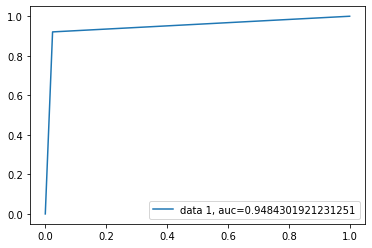

In [35]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SMOTE Sampling

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
print('Original dataset shape %s' % Counter(y))

rus = SMOTE(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 283253, 1: 473})
Resampled dataset shape Counter({0: 283253, 1: 283253})


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred , y_test))  # Accuracy is surely reducedd , let's look at the roc curve now

0.9443254565995105


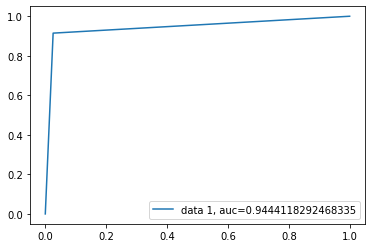

In [40]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [41]:
# Let's Visulaise the SMOTE
len(y)
#plt.scatter(x = X , y = y)

283726

# Principal Component Analysis

In [42]:
from sklearn.decomposition import PCA # SVD , t-SNE , Linear Discrimant Analysis
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_res)

In [ ]:
# reduce 29 columns - 2 columns , so that I can look at them in a plot !

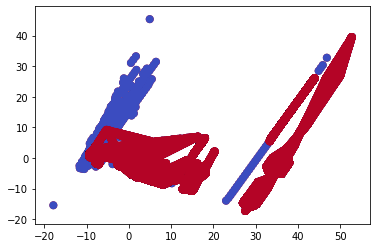

In [43]:
#f,ax = plt.figure(figsize=(24,6))

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res== 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.show()

In [44]:
# let's now try either different models , first by creating multiple datsets for undersampled , oversampled and SMOTE sampled

# Undersampled Data

In [45]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))


Resampled dataset shape Counter({0: 473, 1: 473})


# Oversampled Data

In [46]:
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 283253, 1: 283253})


# SMOTE Data

In [47]:
rus = SMOTE(random_state=42)
X_smote, y_smote = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 283253, 1: 283253})


# Now applying different models and evaluating the dataset

In [48]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Classifier 2 - Decision Tree Classifier

0.9992833478230222


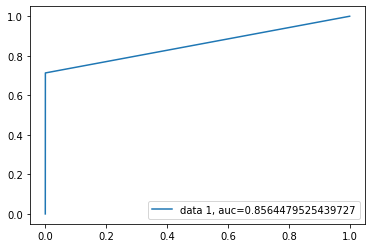

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

y_pred = dte.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

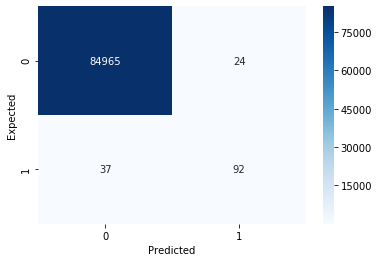

In [50]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.8661971830985915


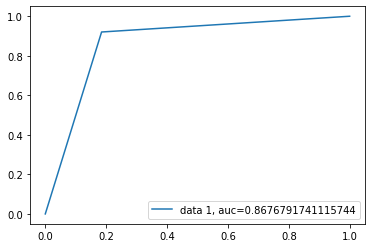

In [51]:
# Undersampled data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

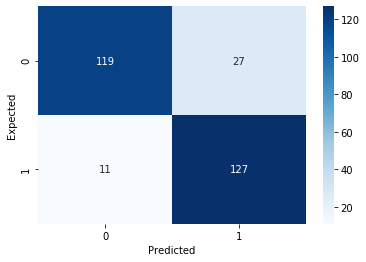

In [52]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9996587271700245


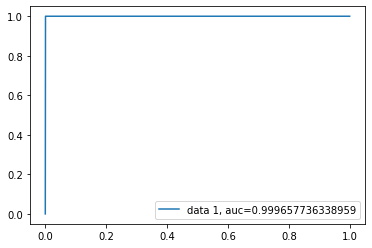

In [53]:
# Oversampled data with Decision Tree Classifiers # Best model after Classifier - DTE

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

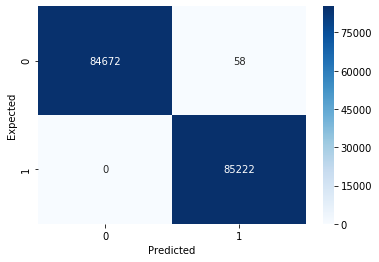

In [54]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0.9981112314065148


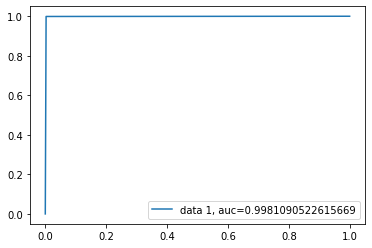

In [55]:
# SMOTE data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
dte = DecisionTreeClassifier()
dte.fit(X_train, y_train)

y_pred = dte.predict(X_test)
print(accuracy_score(y_pred , y_test))

y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

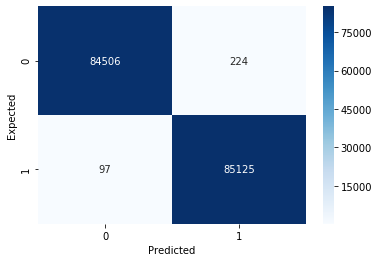

In [56]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Classifier - 3 Random Forest Classifier

In [57]:
# Raw Data

0.9995183157499001


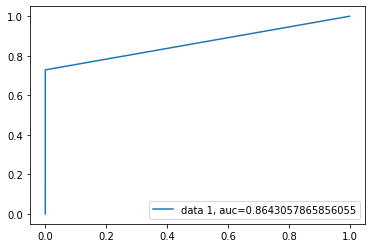

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

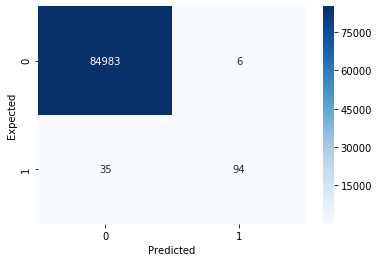

In [59]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [60]:
# Undersampled

0.9330985915492958


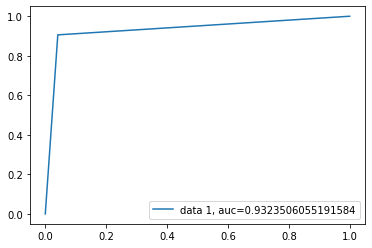

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

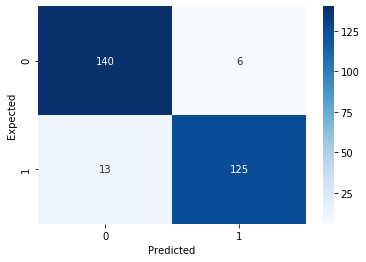

In [62]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [63]:
# Oversampled Data

0.9999058557710412


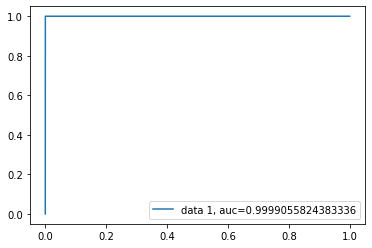

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

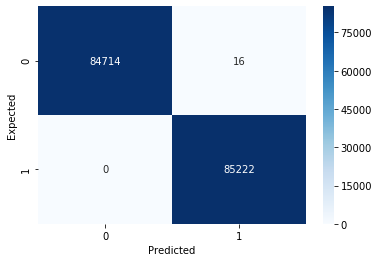

In [65]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [66]:
# Smote Data

0.9997999435134626


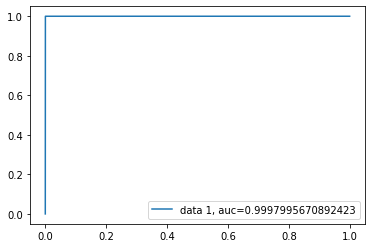

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )

y_pred = rfc.predict(X_test)

print(accuracy_score(y_pred , y_test))

y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

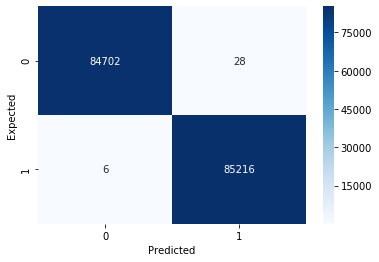

In [68]:
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [69]:
# 1. Dimensionality Reduction Techniques on the Data - SVD , t-SNE , PCA

In [ ]:
log_reg = LogisticRegression(penalty = 'l2' , C = 0.01)
.fit
.predict

# Power of GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


# Random Forest Classifier - Test / Submission - Project Evaluation 
# accuracy Score
# AUC Score , Plot
# Confusin Matrix

# OutPut - Whichc classifier , Which sampling Technique , Best Parameters ?

KeyboardInterrupt: 